In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define important variables

In [14]:
nbr_of_samples = 500
range_start = -3
range_end = 3
range_of_sampling = np.random.uniform(range_start, range_end, nbr_of_samples)
range_of_obs = np.linspace(range_start, range_end, nbr_of_samples)

mean_noise = 0 
std_noise = 1
gaussion_noise = np.random.normal(mean_noise, std_noise, size=nbr_of_samples)

In [15]:
def generate_obs(func, *args, range_of_sampling, noise=None):

    obs = func(*args, x=range_of_sampling)
    if noise is not None:
        obs += noise

    return obs

### Define functions

In [16]:
obs_poly5 = generate_obs(lambda x: 0.5*x**5 - x**4 - 4*x**3 + 6*x**2 - 4*x + 1,
                         range_of_sampling=range_of_sampling)

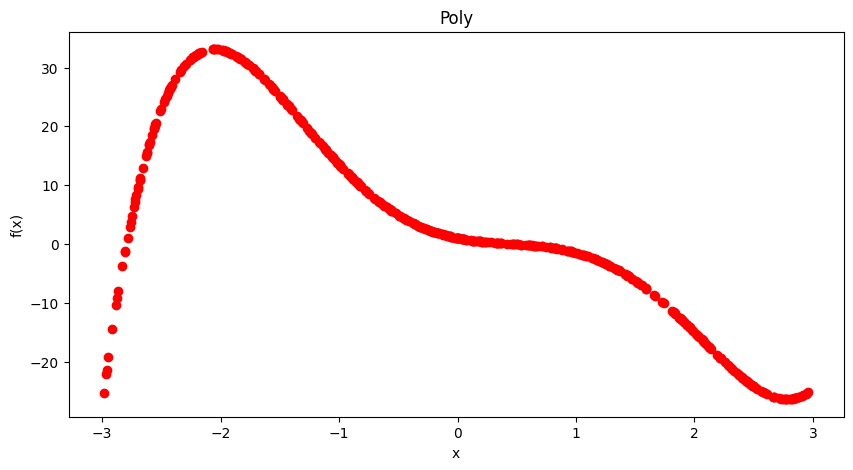

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(range_of_sampling, obs_poly5, color="red")
plt.title("Poly")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [18]:
range_of_sampling_2d = np.random.uniform(range_start, range_end, nbr_of_samples)

obs_poly3 = generate_obs(lambda x: x**3 - 2*x**2 - 3*x,
                         range_of_sampling=range_of_sampling_2d)

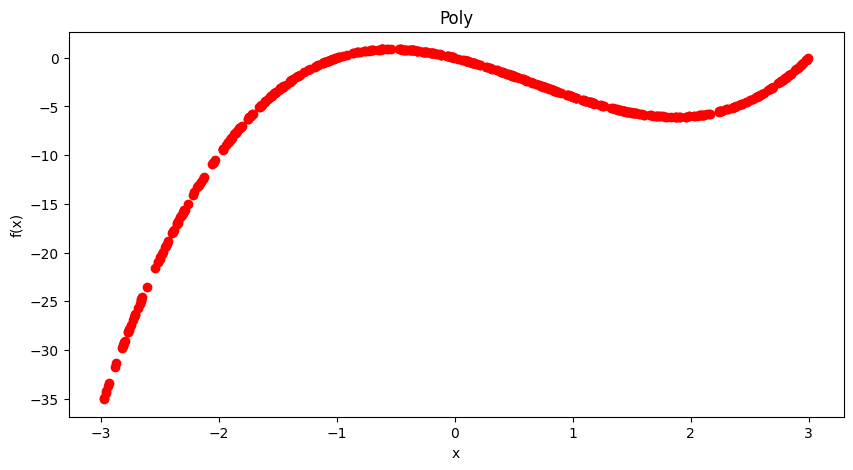

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(range_of_sampling_2d, obs_poly3, color="red")
plt.title("Poly")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
obs_z_poly3_poly5 = obs_poly3 + obs_poly5

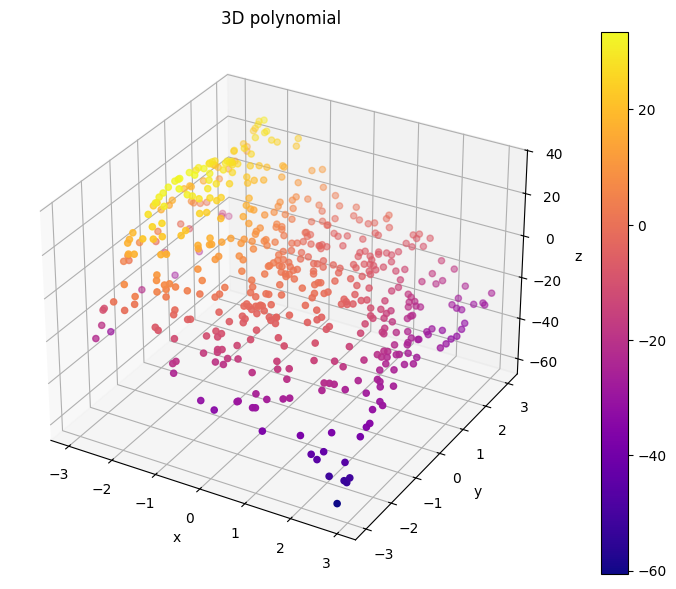

In [21]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
plot_3d = ax.scatter(range_of_sampling, range_of_sampling_2d,
                obs_z_poly3_poly5,
                cmap='plasma', c=obs_z_poly3_poly5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D polynomial")
plt.colorbar(plot_3d)
plt.tight_layout()
plt.show()

### Saving data sets

In [22]:
folder_path = "./Dfs/"
infos_sampling = f"___nbr_of_samples={nbr_of_samples}___range_of_sampling=({range_start}, {range_end})"

In [23]:
# Poly_2D_5
df = pd.DataFrame({'y': obs_poly5}, index=range_of_sampling)
df.to_csv(folder_path+"2D_Poly5"+infos_sampling+".csv")

In [24]:
# Poly_3D_3_5
df = pd.DataFrame({'z': obs_z_poly3_poly5, 
                   'x': range_of_sampling, 
                   'y':range_of_sampling_2d})
df.to_csv(folder_path+"3D_Poly_3_5"+infos_sampling+".csv")